# Compare classifier performance across cell representations

In [1]:
import polars as pl 
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison

## Seal outcomes

In [2]:
seal_preds = pl.read_parquet("./compiled_results/compiled_seal_metrics.parquet")
df_pandas = seal_preds.to_pandas()

### AUROC

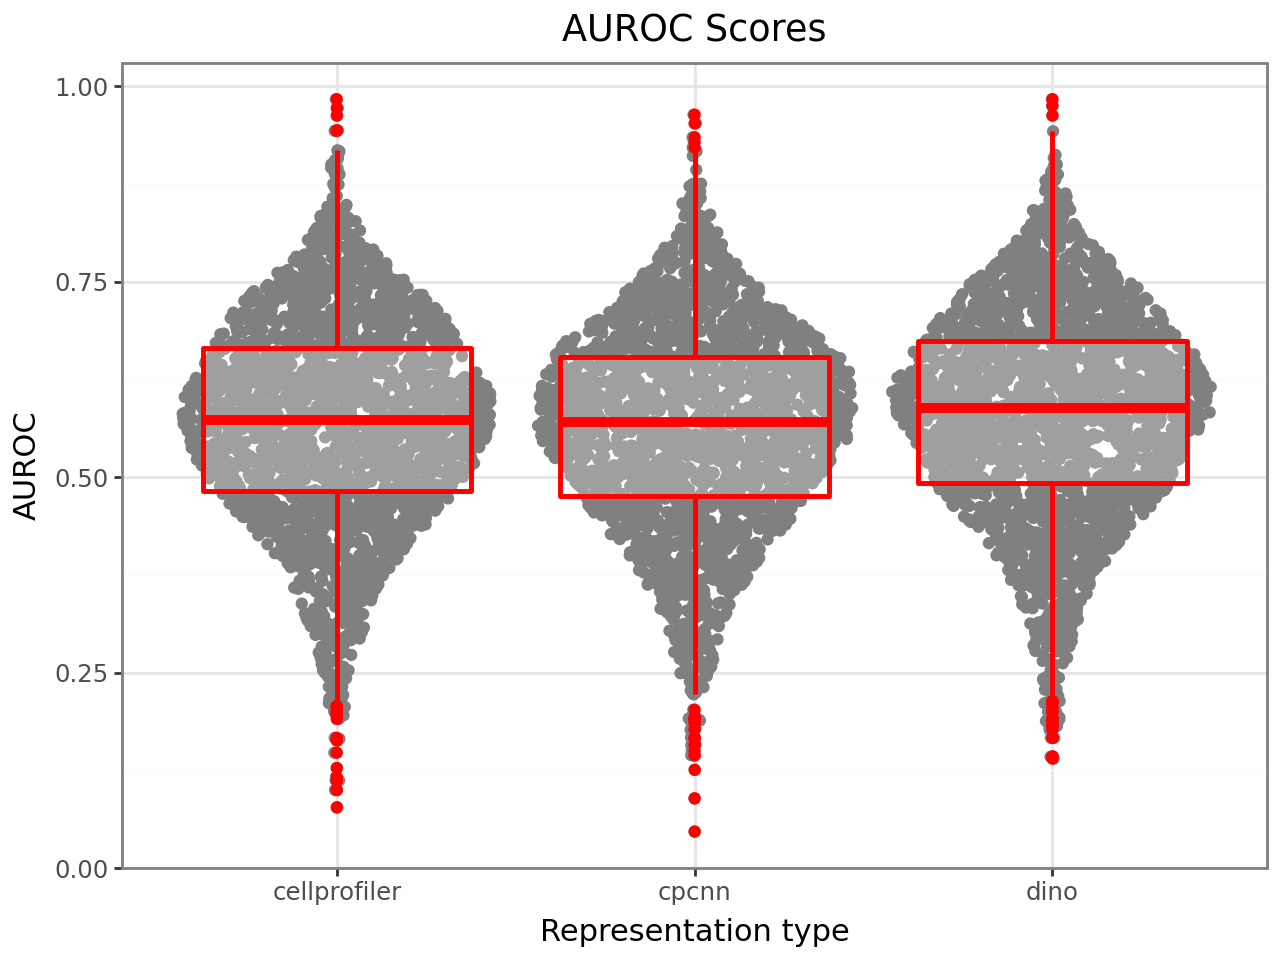

In [3]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(seal_preds, aes(x='Feat_type', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores', x='Representation type', y='AUROC') 
    + theme_bw()
)
plot.show()

In [4]:
# AUROC
model = smf.mixedlm("AUROC ~ Feat_type", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------------
cellprofiler  cpcnn  -0.0057 0.0332 -0.011 -0.0004   True
cellprofiler   dino   0.0116    0.0 0.0063  0.0168   True
       cpcnn   dino   0.0173    0.0  0.012  0.0225   True
---------------------------------------------------------
[3.32497516e-02 6.57422625e-07 7.79265541e-13]


### macro-averaged F1

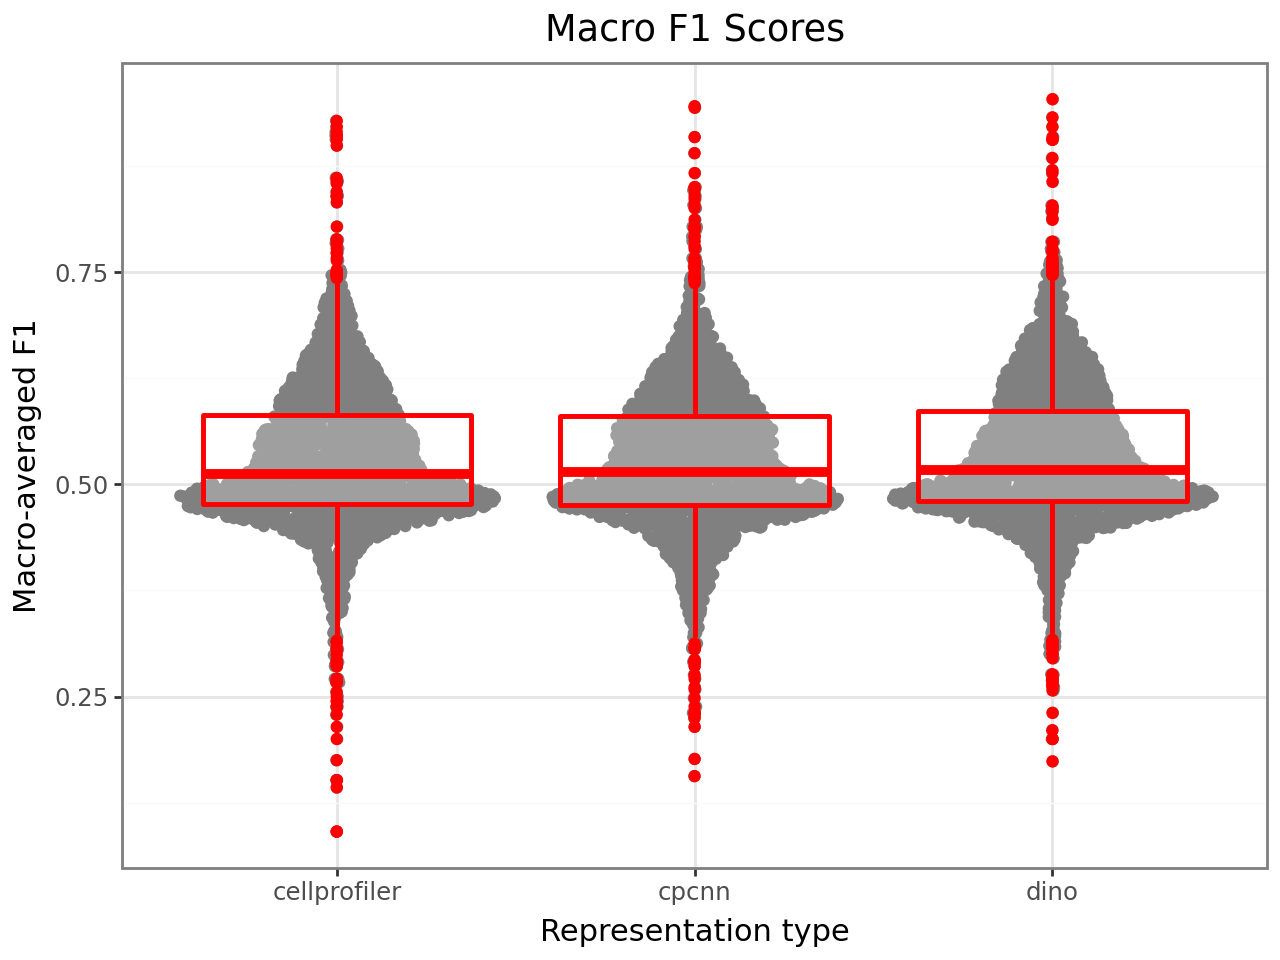

In [5]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(seal_preds, aes(x='Feat_type', y='Macro_F1')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='Macro F1 Scores', x='Representation type', y='Macro-averaged F1') 
    + theme_bw()
)
plot.show()

In [6]:
# F1 (macro-averaged)
model = smf.mixedlm("Macro_F1 ~ Feat_type", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------------
cellprofiler  cpcnn  -0.0012 0.6801 -0.0044 0.0021  False
cellprofiler   dino   0.0059    0.0  0.0028 0.0091   True
       cpcnn   dino   0.0071    0.0  0.0039 0.0103   True
---------------------------------------------------------
[6.80105946e-01 3.33852917e-05 6.10752517e-07]


### PRAUC

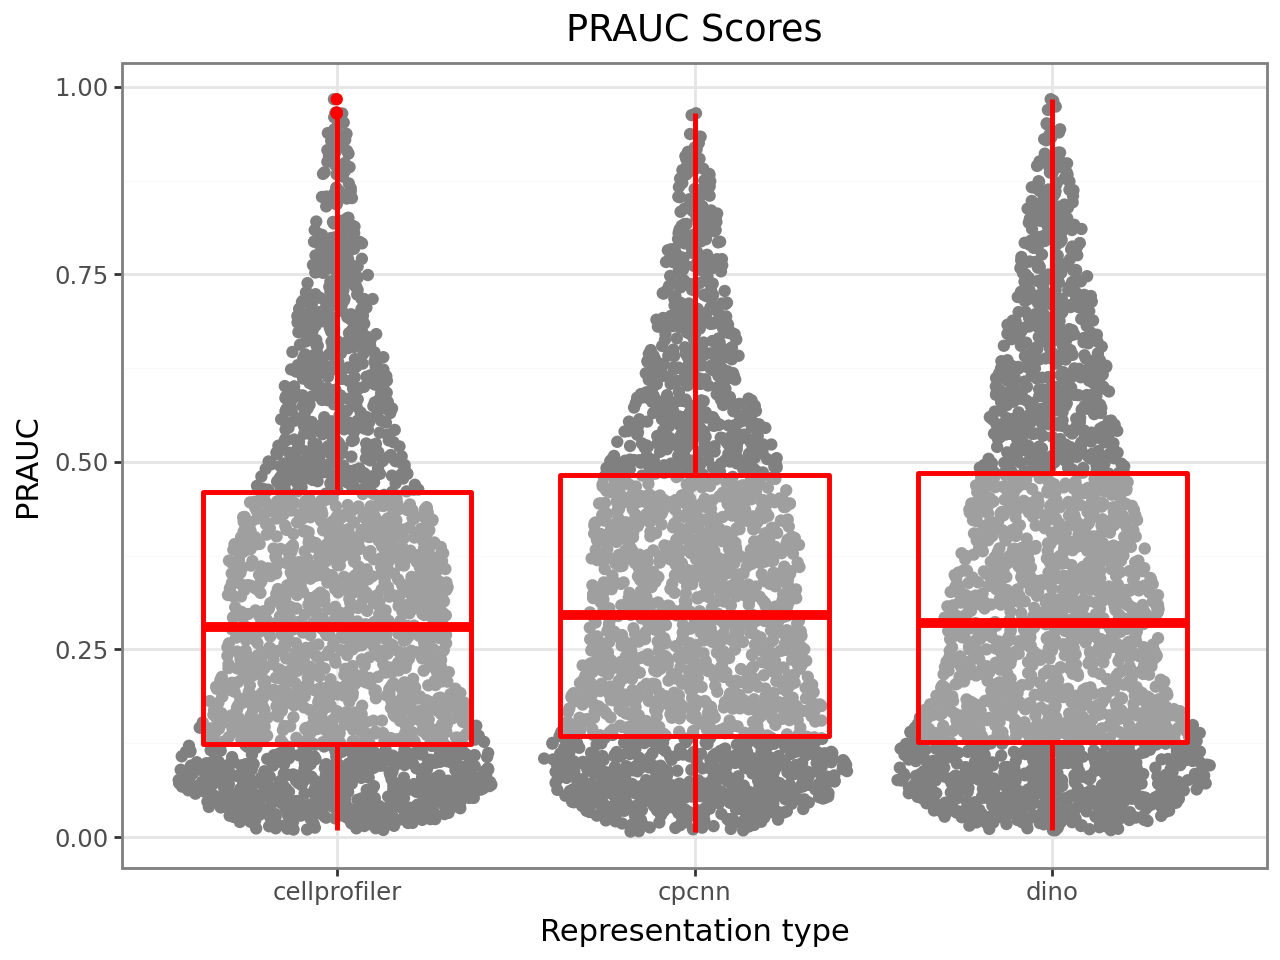

In [7]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(seal_preds, aes(x='Feat_type', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC Scores', x='Representation type', y='PRAUC') 
    + theme_bw()
)
plot.show()

In [8]:
# PR-AUC
model = smf.mixedlm("PRAUC ~ Feat_type", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------------
cellprofiler  cpcnn   0.0113 0.1678 -0.0034 0.0259  False
cellprofiler   dino   0.0086 0.3383 -0.0058  0.023  False
       cpcnn   dino  -0.0027 0.9032 -0.0171 0.0118  False
---------------------------------------------------------
[0.1677791  0.33827168 0.90318249]


### Binary F1 Score

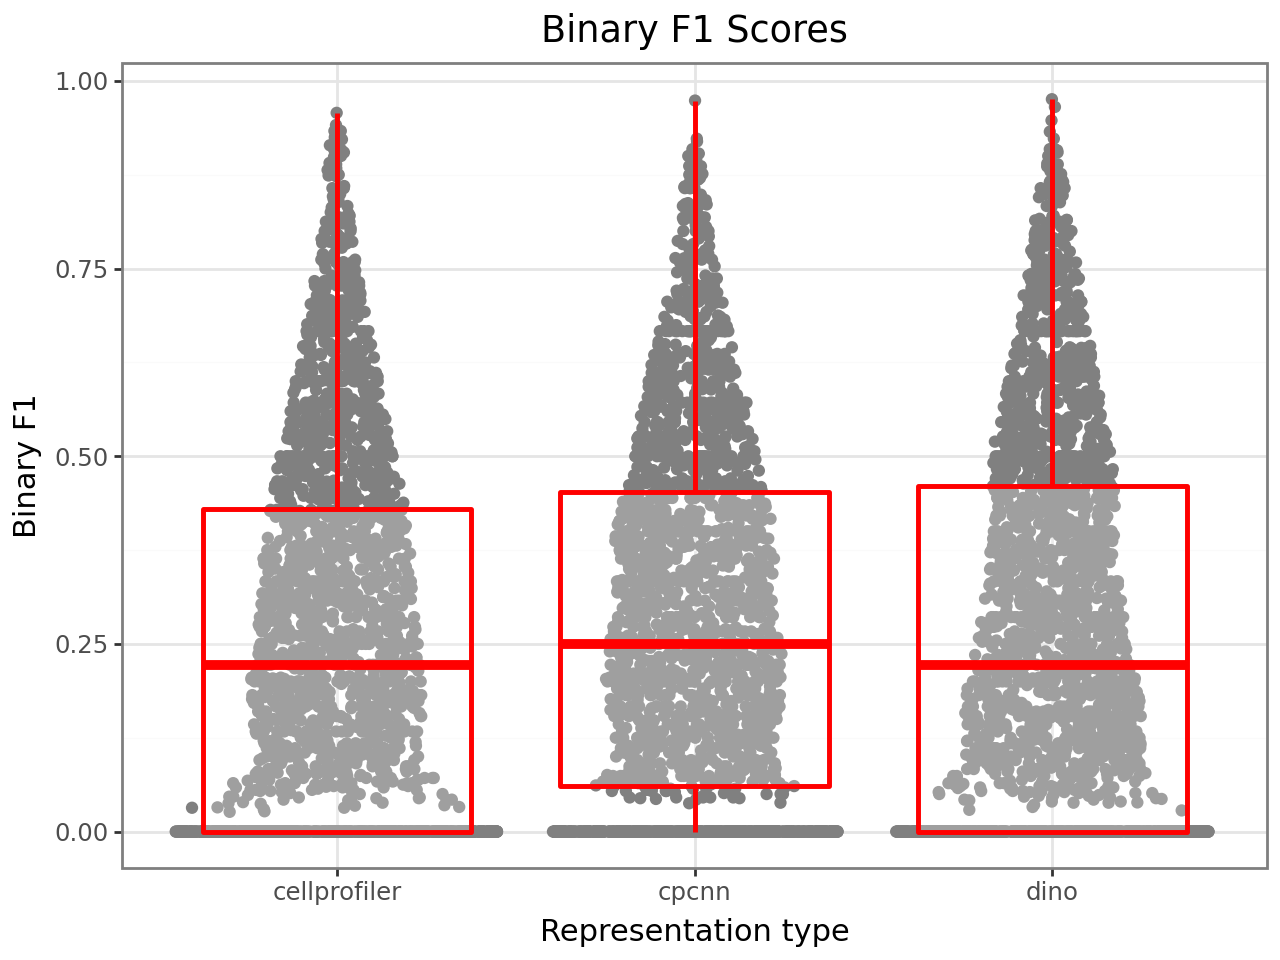

In [9]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(seal_preds, aes(x='Feat_type', y='F1')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='Binary F1 Scores', x='Representation type', y='Binary F1') 
    + theme_bw()
)
plot.show()

In [10]:
# Binary F1
model = smf.mixedlm("F1 ~ Feat_type", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------------
cellprofiler  cpcnn   0.0156 0.0385  0.0006 0.0305   True
cellprofiler   dino   0.0062 0.5804 -0.0084 0.0209  False
       cpcnn   dino  -0.0094 0.2995 -0.0241 0.0054  False
---------------------------------------------------------
[0.03854986 0.5804416  0.29950311]


## Motive outcomes

In [11]:
motive_preds = pl.read_parquet("./compiled_results/compiled_motive_metrics.parquet")
motive_pandas = motive_preds.to_pandas()

### AUROC

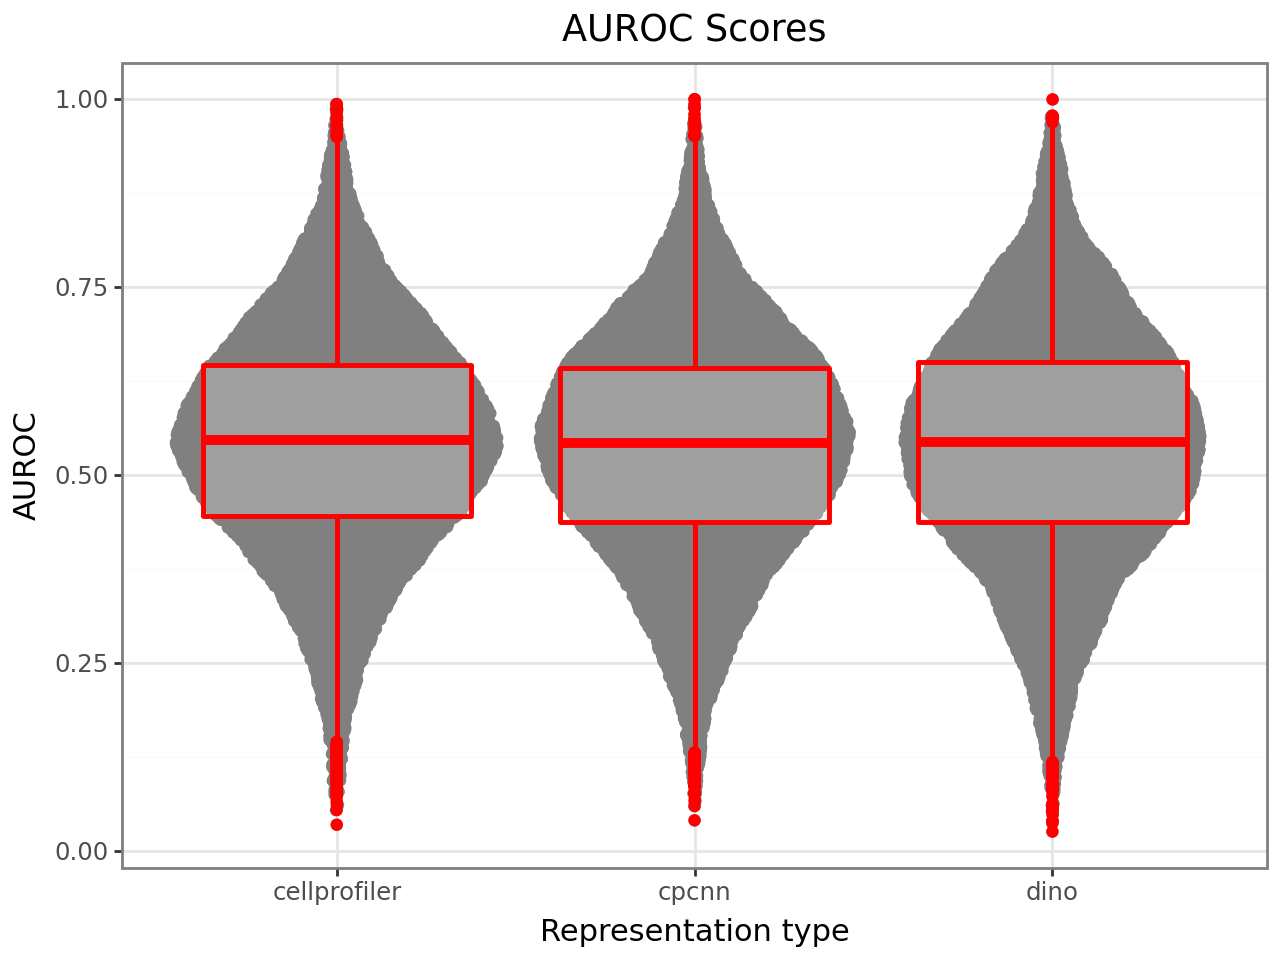

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------------
cellprofiler  cpcnn  -0.0069   0.0 -0.0086 -0.0051   True
cellprofiler   dino  -0.0039   0.0 -0.0055 -0.0022   True
       cpcnn   dino    0.003   0.0  0.0014  0.0046   True
---------------------------------------------------------
[0.00000000e+00 1.26798763e-07 4.91280725e-05]


In [12]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(motive_preds, aes(x='Feat_type', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores', x='Representation type', y='AUROC') 
    + theme_bw()
)
plot.show()

# AUROC
model = smf.mixedlm("AUROC ~ Feat_type", motive_pandas, groups=motive_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
motive_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(motive_pandas["fitted_values"], motive_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

### Macro-averaged F1

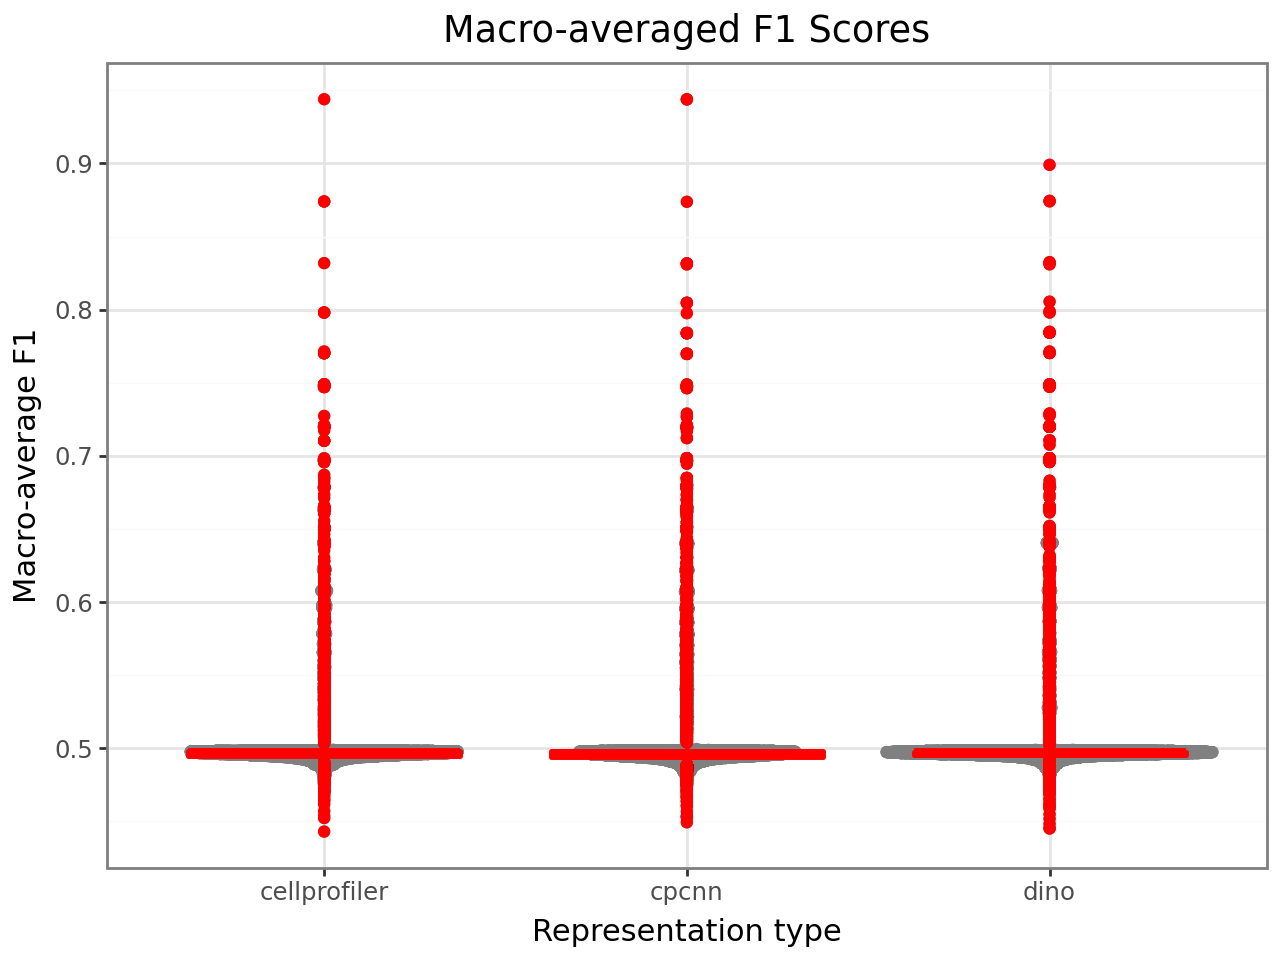

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1    group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------------
cellprofiler  cpcnn   0.0018    0.0  0.0014  0.0022   True
cellprofiler   dino     -0.0 0.9707 -0.0004  0.0003  False
       cpcnn   dino  -0.0018    0.0 -0.0022 -0.0015   True
----------------------------------------------------------
[0.         0.97067997 0.        ]


In [13]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(motive_preds, aes(x='Feat_type', y='Macro_F1')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='Macro-averaged F1 Scores', x='Representation type', y='Macro-average F1') 
    + theme_bw()
)
plot.show()

# F1 (macro-averaged)
model = smf.mixedlm("Macro_F1 ~ Feat_type", motive_pandas, groups=motive_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
motive_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(motive_pandas["fitted_values"], motive_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

### PR-AUC

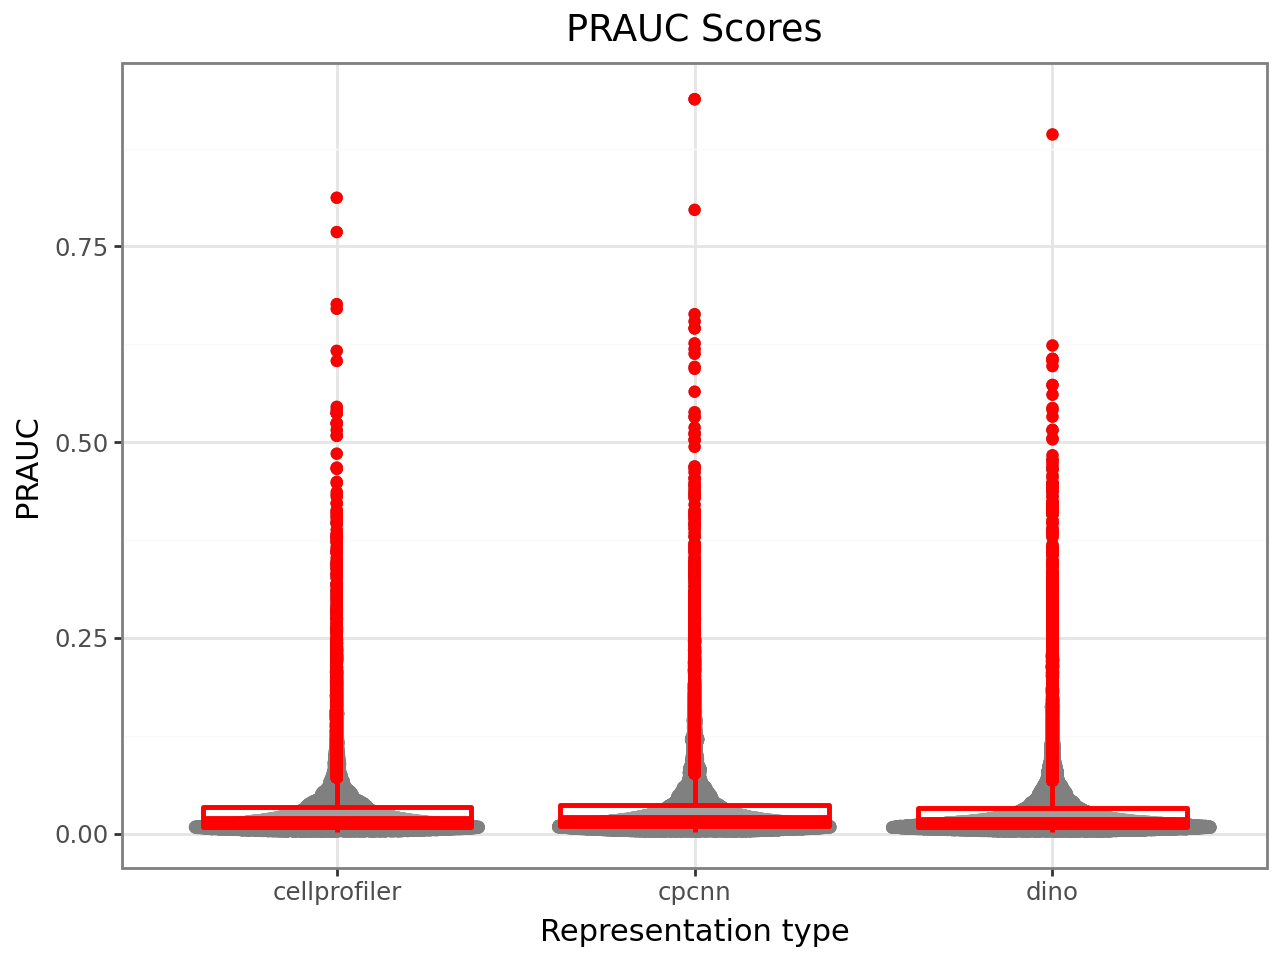

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------------
cellprofiler  cpcnn   0.0034    0.0  0.0026 0.0042   True
cellprofiler   dino  -0.0004 0.4434 -0.0012 0.0004  False
       cpcnn   dino  -0.0038    0.0 -0.0045 -0.003   True
---------------------------------------------------------
[0.         0.44342047 0.        ]


In [14]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(motive_preds, aes(x='Feat_type', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC Scores', x='Representation type', y='PRAUC') 
    + theme_bw()
)
plot.show()

# PR-AUC
model = smf.mixedlm("PRAUC ~ Feat_type", motive_pandas, groups=motive_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
motive_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(motive_pandas["fitted_values"], motive_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

### Binary F1

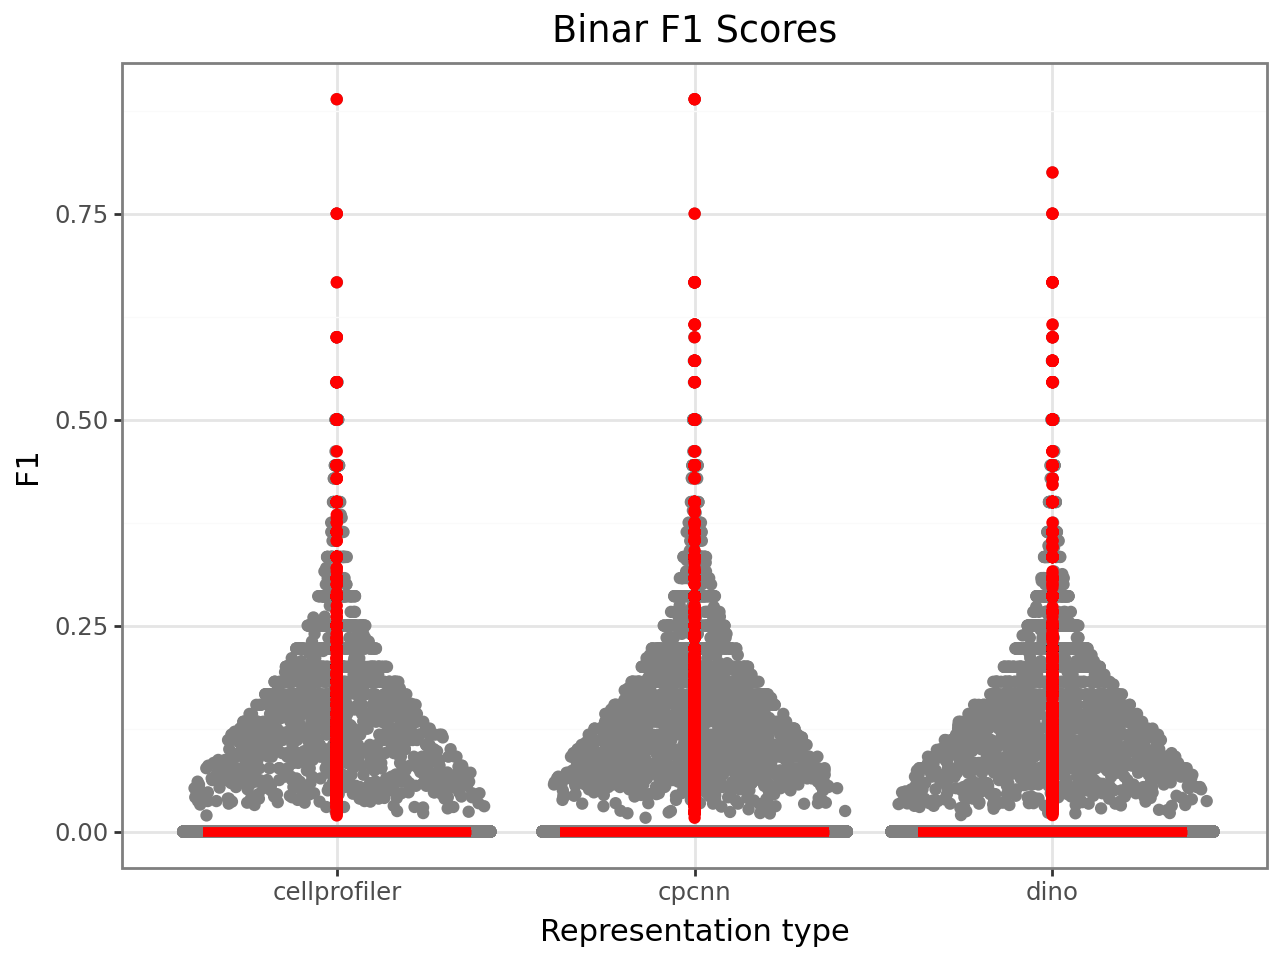

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1    group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------------
cellprofiler  cpcnn   0.0049    0.0  0.0042  0.0057   True
cellprofiler   dino  -0.0007 0.0761 -0.0014  0.0001  False
       cpcnn   dino  -0.0056    0.0 -0.0063 -0.0049   True
----------------------------------------------------------
[0.         0.07609628 0.        ]


In [15]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(motive_preds, aes(x='Feat_type', y='F1')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='Binary F1 Scores', x='Representation type', y='F1') 
    + theme_bw()
)
plot.show()

# Binary F1
model = smf.mixedlm("F1 ~ Feat_type", motive_pandas, groups=motive_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
motive_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(motive_pandas["fitted_values"], motive_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)